<a href="https://colab.research.google.com/github/nickdlc/temp-repo/blob/main/911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. The instructor will provide a range of questions to answer, and you should use your knowledge to complete them as a team.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
sns.set()

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data = pd.read_csv('/content/drive/MyDrive/Sem6/data-analytics/Notebooks/NumPy Basics/Data/911.csv')

In [42]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [43]:
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [44]:
data.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


# Instructor's Questions

## Question 1

What are the top 5 zip codes for 911 calls?

In [45]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## Question 2

What are the top 5 townships for 911 calls?

In [46]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Question 3



In [47]:
data['title'].nunique()

110

In [48]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
Fire: DIABETIC EMERGENCY               1
EMS: BOMB DEVICE FOUND                 1
Fire: SYNCOPAL EPISODE                 1
Fire: UNKNOWN MEDICAL EMERGENCY        1
EMS: PLANE CRASH                       1
Name: title, Length: 110, dtype: int64

### Creating a new column for call reasons

In [49]:
# Creates a new column of reasons for the 911 calls

data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [50]:
# Prints the values for each uninque reason

data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

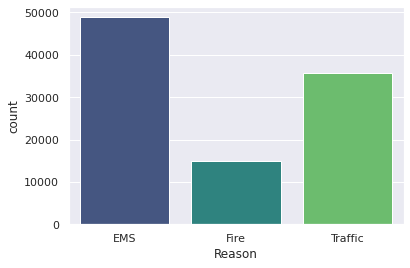

In [51]:
# Plotting the counts for each reason using seaborn

sns.countplot(x='Reason', data=data, palette='viridis')

## Question 4

What's the most common call reason on each day of the week and month of the year?

### Focusing on time information

In [52]:
# Shows that the type of all elements in the timeStamp column are strings

type(data['timeStamp'].iloc[0])

str

In [53]:
# Converts the strings in the timeStamp column to datetime objects

data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [54]:
time = data['timeStamp'].iloc[0]

In [55]:
# Creating 3 new columns based on the new datetime objects created

data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Day'] = data['timeStamp'].apply(lambda time: time.dayofweek)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Year'] = data['timeStamp'].apply(lambda time: time.year)

In [56]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Month,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,2015
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,3,12,2015
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,3,12,2015
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,3,12,2015
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,3,12,2015
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,3,12,2015


In [57]:
# Creating a map of days of the week

day_map = {0: 'Mon',
           1: 'Tues',
           2: 'Wed',
           3: 'Thurs',
           4: 'Fri',
           5: 'Sat',
           6: 'Sun',}

In [58]:
# Mapping the days to the int values in the 

data['Day'] = data['Day'].map(day_map)

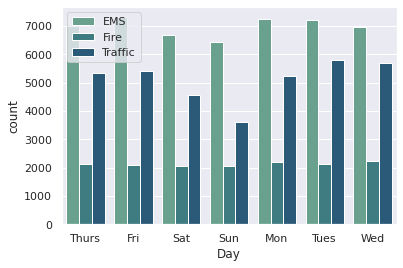

In [59]:
# Plotting the reasons for calls by day

sns.countplot(x='Day', data=data, hue='Reason', palette='crest')
plt.legend(loc='best')

In [60]:
byMonth = data.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Year
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


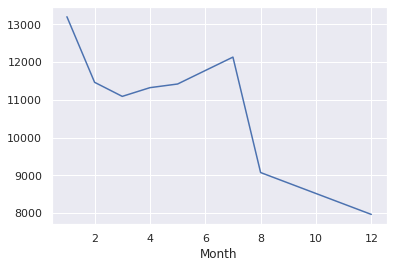

In [61]:
# Plot of count of calls for each month using the townships

byMonth['twp'].plot()

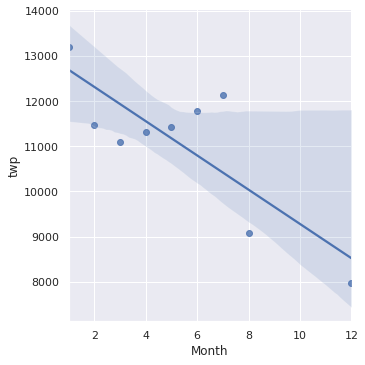

In [62]:
# seaborn limit plot

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [63]:
data['Date'] = data['timeStamp'].apply(lambda t: t.date())

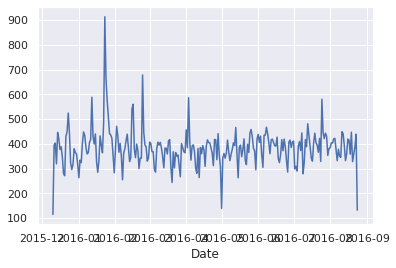

In [64]:
data.groupby('Date').count()['twp'].plot()

# Self-Created Questions

1. What are the 10 most common titles for 911 emergency calls?
1. How many emergency calls did each zip code make?
1. What township(s) made the least 911 emergency calls?
1. How many addresses have "dead end" in them?
1. How many 911 emergency calls were made in each year?

## Question 1

What are the 10 most common titles for 911 emergency calls?

In [65]:
data['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

In [66]:
titles = data['title'].value_counts()[:10].to_dict()

print('The 10 most common titles are:\n')
print('                Title           |   Count')
print('------------------------------------------------')

for key,value in titles.items():
  print(" % 30s" % key + '\t|',
        " % 5d" % value)

The 10 most common titles are:

                Title           |   Count
------------------------------------------------
    Traffic: VEHICLE ACCIDENT -	|   23066
    Traffic: DISABLED VEHICLE -	|   7702
               Fire: FIRE ALARM	|   5496
     EMS: RESPIRATORY EMERGENCY	|   5112
         EMS: CARDIAC EMERGENCY	|   5012
               EMS: FALL VICTIM	|   4863
          EMS: VEHICLE ACCIDENT	|   3935
    Traffic: ROAD OBSTRUCTION -	|   3144
           EMS: SUBJECT IN PAIN	|   2687
               EMS: HEAD INJURY	|   2631


## Question 2

How many emergency calls did each zip code make?

In [67]:
# df['zip'].dropna().unique() would remove the NaN zip codes if using the unique method

# Since each row is an instance of an emergency call, we merely need to count the number
# of occurrences of each zip code. We then turn the series to 
zip_code_calls = data['zip'].value_counts().to_dict()

print('The following table shows how many calls each zip code made between Dec. 2015 and Aug. 2016.\n')
print(' Zip Code          Calls')

for key,value in zip_code_calls.items():
  #print('Zip code', int(key), 'made', value, 'emergency calls between Dec. 2015 and Aug. 2016.')
  print(' % 5d' % key + '\t\t',
        ' % 4d' % value)

The following table shows how many calls each zip code made between Dec. 2015 and Aug. 2016.

 Zip Code          Calls
  19401		   6979
  19464		   6643
  19403		   4854
  19446		   4748
  19406		   3174
  19002		   3050
  19468		   2990
  19454		   2781
  19090		   2635
  19038		   2578
  19046		   2564
  19426		   2461
  19428		   2296
  19006		   2256
  19462		   2078
  19040		   2043
  19438		   1990
  19422		   1963
  19027		   1818
  19044		   1595
  19001		   1514
  19010		   1316
  18964		   1287
  19004		   1280
  19440		   1190
  19096		   1115
  19003		   1094
  19095		   1023
  19473		   1012
  19444		   1008
  19525		   965
  19034		   796
  18073		   736
  19072		   728
  18969		   672
  19012		   593
  19031		   566
  19025		   493
  19035		   481
  19465		   458
  19066		   451
  19041		   436
  18074		   435
  19405		   428
  19460		   427
  18041		   414
  19087		   344
  18054		   326
  18076		   306
  19085		   304
  19075		   302
  19150		   288
  19151		   287
  1

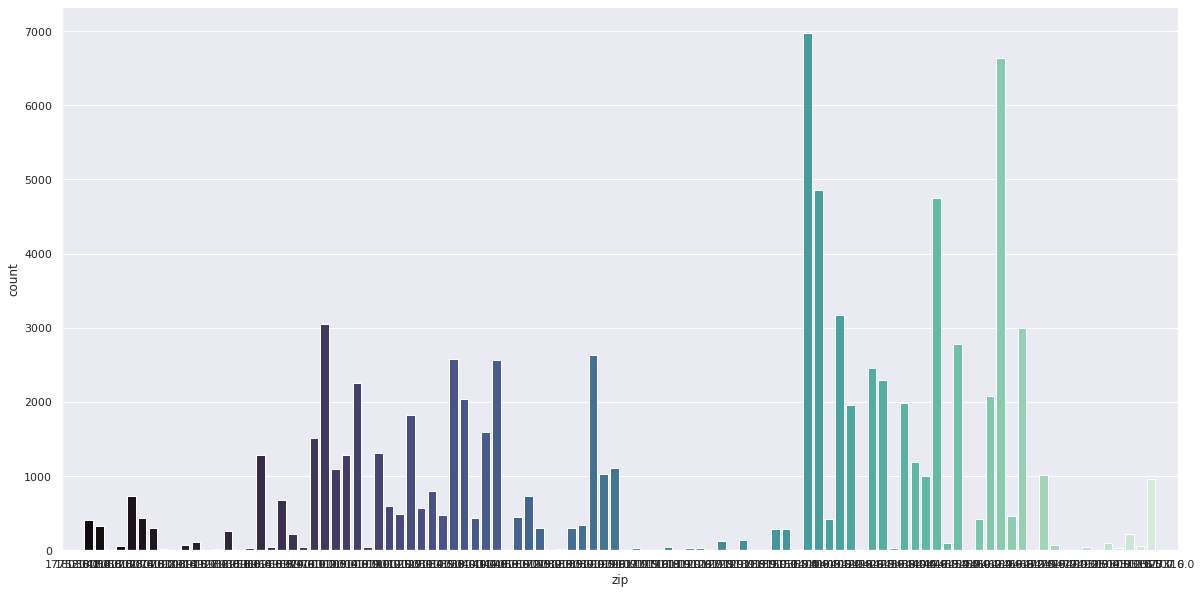

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(x='zip', data=data, palette='mako')

Given the limitations on the size of the graph, this count plot gives a general idea of the number of calls made as zip codes increase. However, a heat map will be more descriptive in showing the number of calls per day of the week made by each zip code.

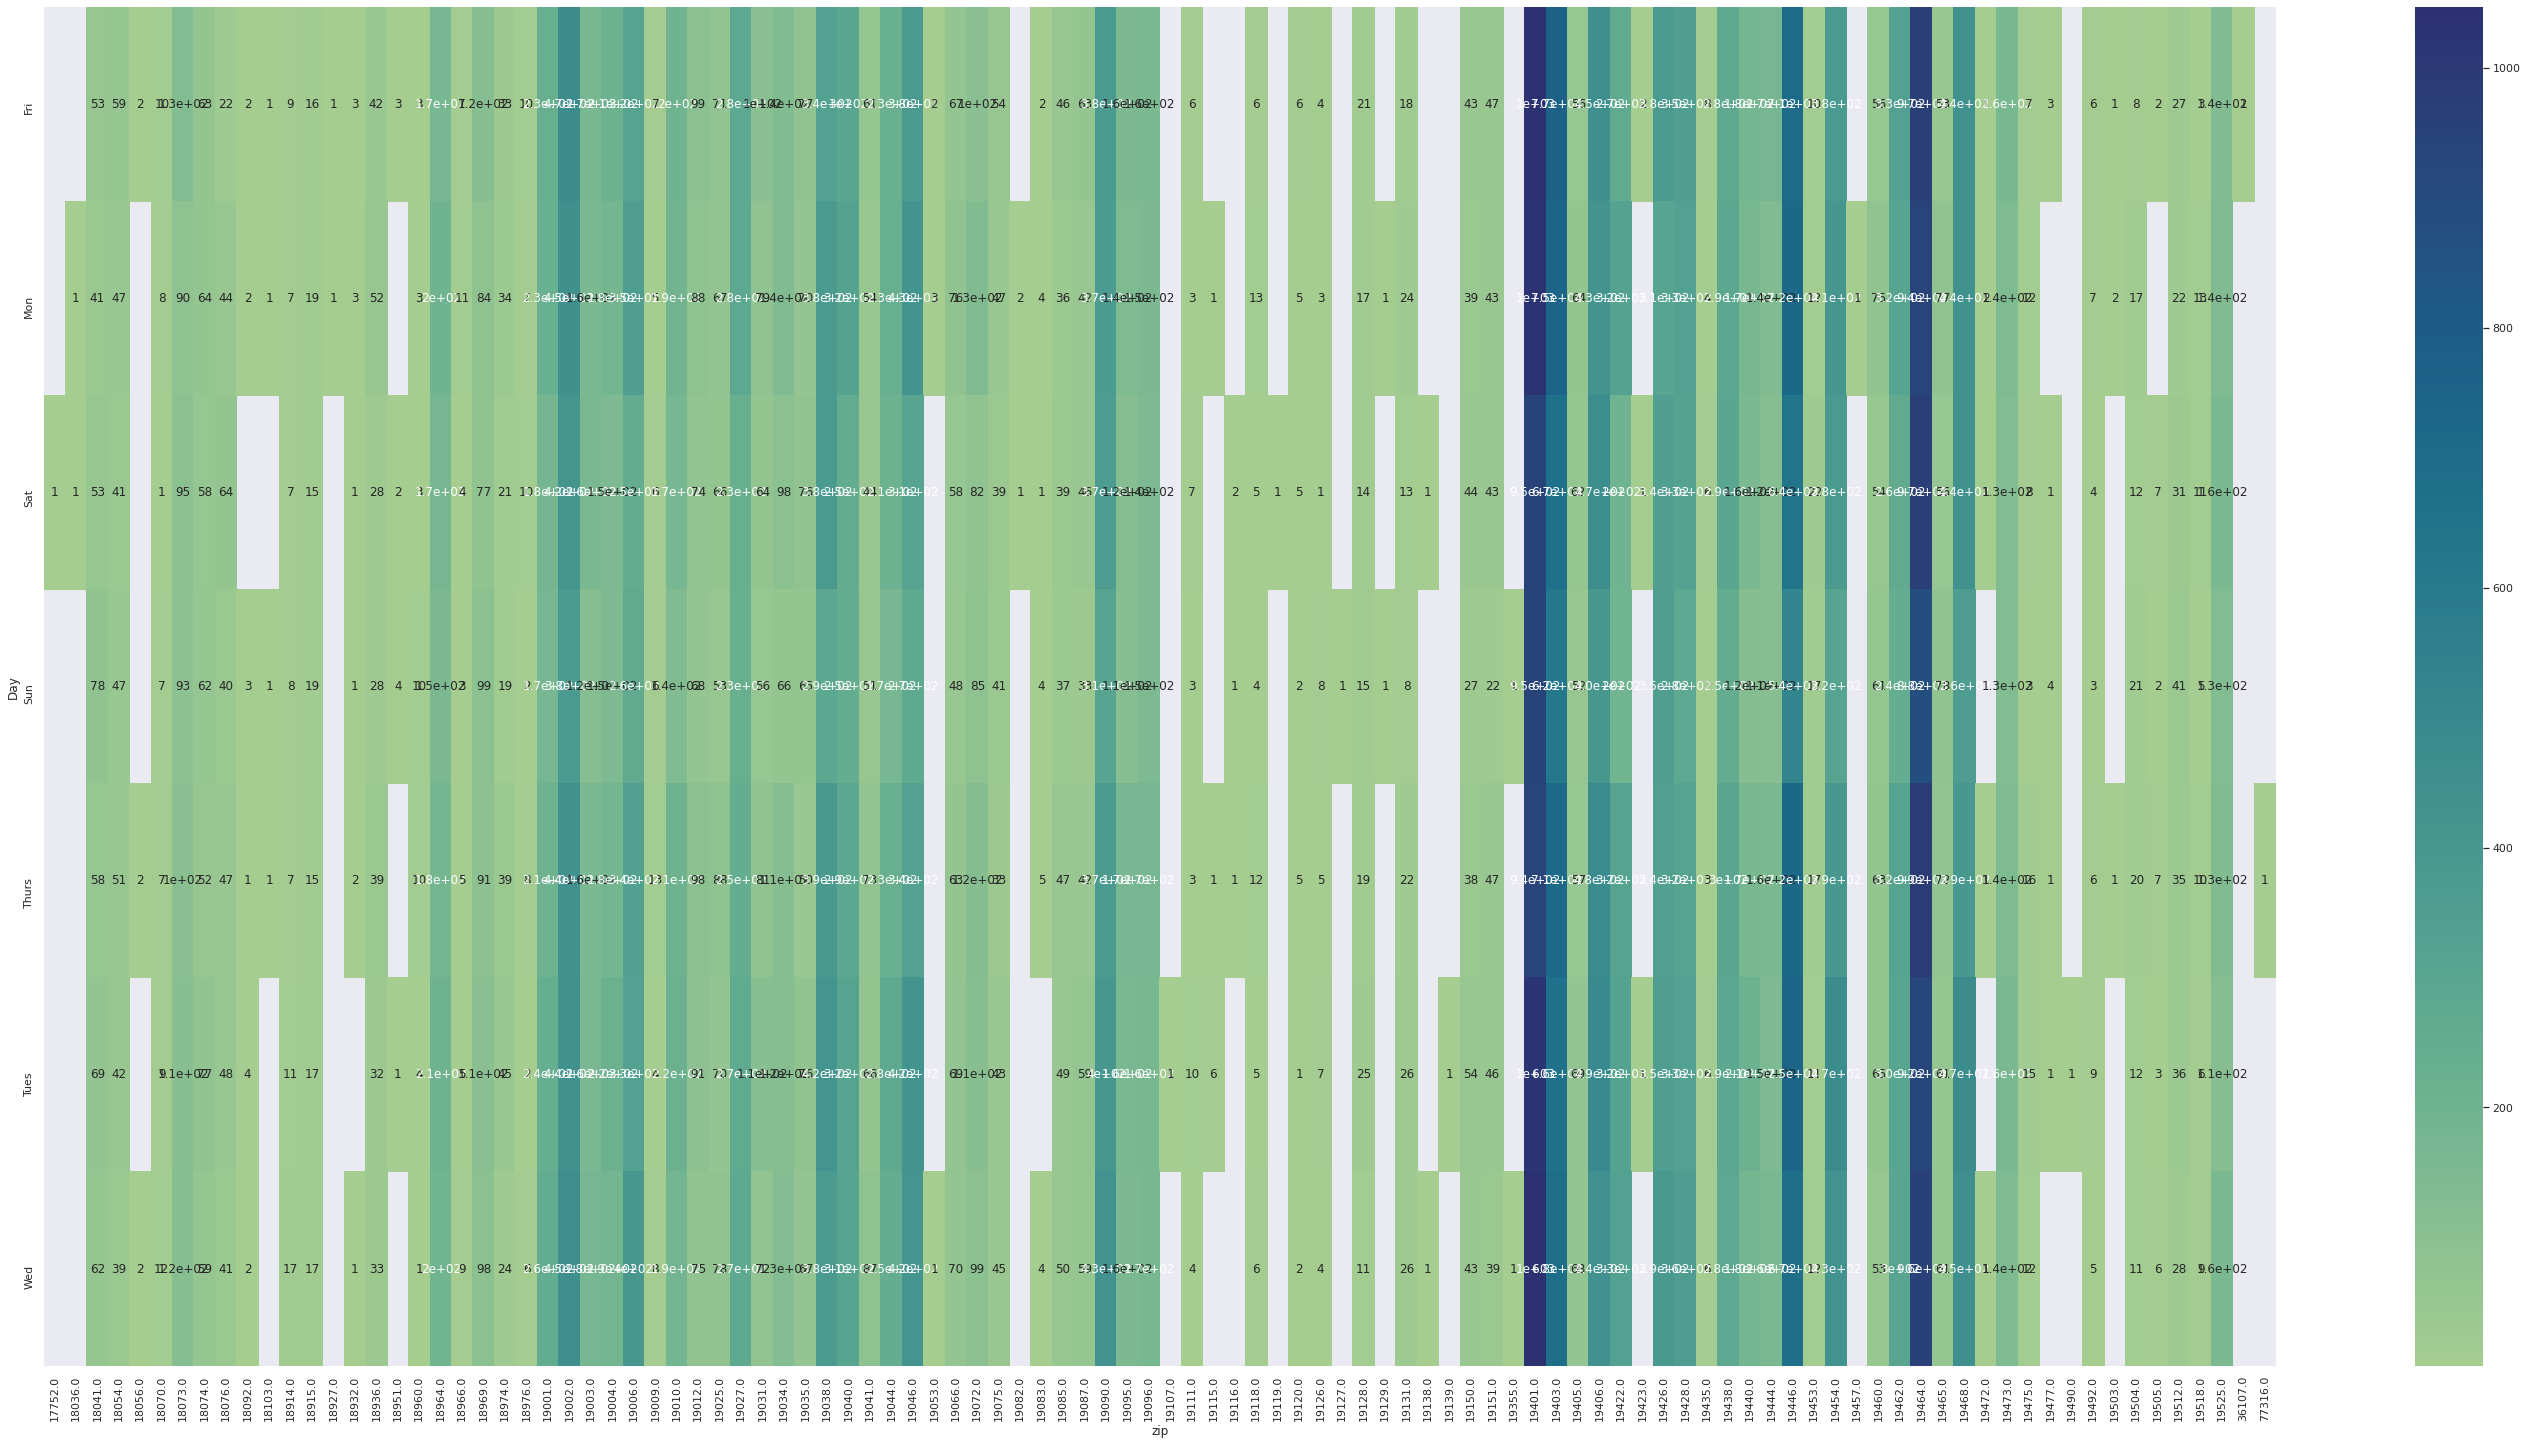

In [69]:
zips = data.groupby(by=['Day','zip']).count()['Reason'].unstack()
plt.figure(figsize=(50,25))
sns.heatmap(zips, cmap='crest', annot=True)

- As shown by the heat map, zip code 77316 only made one emergency call on a Thursday between December 2015 and August 2016
- Similarly, zip code 17752 only made one emergency call on a Saturday and zip code 19457 made one emergency call on a Monday between December 2015 and August 2016.

- On the other hand, based on the colors of the heat map, we can see that 19401 and 19464 made the most calls between December 2015 and August 2016.

## Question 3

What township(s) made the least 911 emergency calls?

In [70]:
data['twp'].value_counts().tail(1)

# Lehigh County (30 calls)

LEHIGH COUNTY    30
Name: twp, dtype: int64

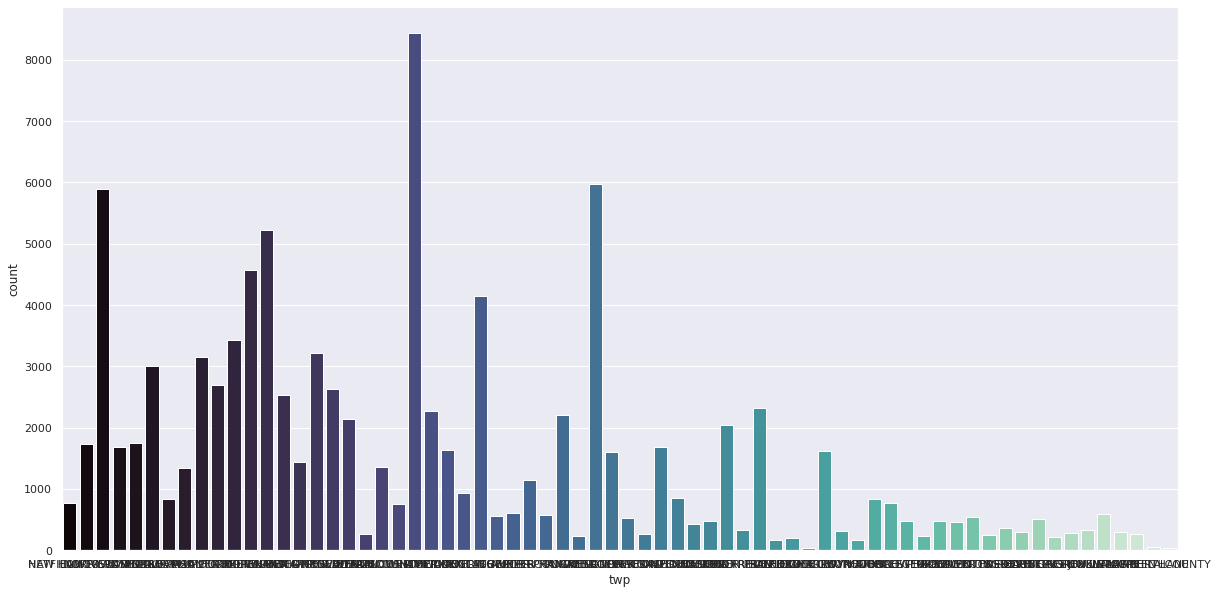

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(x='twp', data=data, palette='mako')

## Question 4

How many addresses have "dead end" in them?

In [72]:
# Counts the number of rows with 'DEAD END' in the addr column
# The na=False argument tells the contains method to not fill missing values
dead_ends = data[data['addr'].str.contains('DEAD END', na=False)]['addr'].count()

print('There are', dead_ends, 'addresses with "DEAD END" in them.')

There are 1390 addresses with "DEAD END" in them.


## Question 5

How many 911 emergency calls were made in each year?

In [73]:
data['Year'].value_counts()

2016    91523
2015     7969
Name: Year, dtype: int64

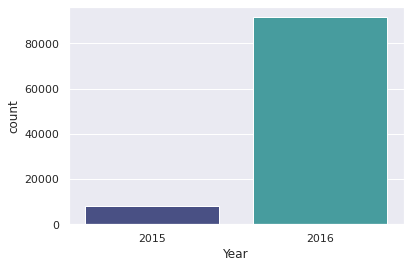

In [74]:
sns.countplot(x='Year', data=data, palette='mako')